# Wiring Resistor Output
### Author: Ayush Pandhi (1003227457)
### Date: October 30, 2018

In [19]:
#Importing required modules
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Defining the model function
def f(x, a, b):
    return a*x + b

#Loading the data sets
cb1_v = np.loadtxt('Cell Battery Option 1_6.4.txt', skiprows=2, usecols=(0,))
cb1_i = (1/1000)*np.loadtxt('Cell Battery Option 1_6.4.txt', skiprows=2, usecols=(1,))
cb1_v = cb1_v[:4]
cb1_i = cb1_i[:4]

cb2_v = np.loadtxt('Cell Battery Option 2_6.4.txt', skiprows=2, usecols=(0,))
cb2_i = (1/1000)*np.loadtxt('Cell Battery Option 2_6.4.txt', skiprows=2, usecols=(1,))
cb2_v = cb2_v[:4]
cb2_i = cb2_i[:4]

ps1_v_6 = np.loadtxt('DC Power Supply Option 1_ 6.4.txt', skiprows=2, usecols=(0,))
ps1_i_6 = (1/1000)*np.loadtxt('DC Power Supply Option 1_ 6.4.txt', skiprows=2, usecols=(1,))
ps1_v_6 = ps1_v_6[:4]
ps1_i_6 = ps1_i_6[:4]

ps1_v_10 = np.loadtxt('DC Power Supply Option 1_10.0.txt', skiprows=2, usecols=(0,))
ps1_i_10 = (1/1000)*np.loadtxt('DC Power Supply Option 1_10.0.txt', skiprows=2, usecols=(1,))
ps1_v_10 = ps1_v_10[:4]
ps1_i_10 = ps1_i_10[:4]

ps1_v_15 = np.loadtxt('DC Power Supply Option 1_15.0.txt', skiprows=2, usecols=(0,))
ps1_i_15 = (1/1000)*np.loadtxt('DC Power Supply Option 1_15.0.txt', skiprows=2, usecols=(1,))
ps1_v_15 = ps1_v_15[:4]
ps1_i_15 = ps1_i_15[:4]

ps1_v_20 = np.loadtxt('DC Power Supply Option 1_20.0.txt', skiprows=2, usecols=(0,))
ps1_i_20 = (1/1000)*np.loadtxt('DC Power Supply Option 1_20.0.txt', skiprows=2, usecols=(1,))
ps1_v_20 = ps1_v_20[:4]
ps1_i_20 = ps1_i_20[:4]

ps2_v_6 = np.loadtxt('DC Power Supply Option 2_6.4.txt', skiprows=2, usecols=(0,))
ps2_i_6 = (1/1000)*np.loadtxt('DC Power Supply Option 2_6.4.txt', skiprows=2, usecols=(1,))
ps2_v_6 = ps2_v_6[:4]
ps2_i_6 = ps2_i_6[:4]

ps2_v_10 = np.loadtxt('DC Power Supply Option 2_10.0.txt', skiprows=2, usecols=(0,))
ps2_i_10 = (1/1000)*np.loadtxt('DC Power Supply Option 2_10.0.txt', skiprows=2, usecols=(1,))
ps2_v_10 = ps2_v_10[:4]
ps2_i_10 = ps2_i_10[:4]

ps2_v_15 = np.loadtxt('DC Power Supply Option 2_15.0.txt', skiprows=2, usecols=(0,))
ps2_i_15 = (1/1000)*np.loadtxt('DC Power Supply Option 2_15.0.txt', skiprows=2, usecols=(1,))
ps2_v_15 = ps2_v_15[:4]
ps2_i_15 = ps2_i_15[:4]

ps2_v_20 = np.loadtxt('DC Power Supply Option 2_20.0.txt', skiprows=2, usecols=(0,))
ps2_i_20 = (1/1000)*np.loadtxt('DC Power Supply Option 2_20.0.txt', skiprows=2, usecols=(1,))
ps2_v_20 = ps2_v_20[:4]
ps2_i_20 = ps2_i_20[:4]

In [20]:
#Computing the error on each data set based on provided instrument error
cb1_v_error = np.empty(len(cb1_v))
for i in range(len(cb1_v)):
    cb1_v_error[i] = max(cb1_v[i]*0.0025, 0.01)
    
cb1_i_error = np.empty(len(cb1_i))
for i in range(len(cb1_i)):
    cb1_i_error[i] = max(cb1_i[i]*0.0075, 0.1/1000)
    
cb2_v_error = np.empty(len(cb2_v))
for i in range(len(cb2_v)):
    cb2_v_error[i] = max(cb2_v[i]*0.0025, 0.01)
    
cb2_i_error = np.empty(len(cb2_i))
for i in range(len(cb2_i)):
    cb2_i_error[i] = max(cb2_i[i]*0.0075, 0.1/1000)
    
ps1_v_6_error = np.empty(len(ps1_v_6))
for i in range(len(ps1_v_6)):
    ps1_v_6_error[i] = max(ps1_v_6[i]*0.0025, 0.01)
    
ps1_i_6_error = np.empty(len(ps1_i_6))
for i in range(len(ps1_i_6)):
    ps1_i_6_error[i] = max(ps1_i_6[i]*0.0075, 0.1/1000)
    
ps1_v_10_error = np.empty(len(ps1_v_10))
for i in range(len(ps1_v_10)):
    ps1_v_10_error[i] = max(ps1_v_10[i]*0.0025, 0.01)
    
ps1_i_10_error = np.empty(len(ps1_i_10))
for i in range(len(ps1_i_10)):
    ps1_i_10_error[i] = max(ps1_i_10[i]*0.0075, 0.1/1000)
    
ps1_v_15_error = np.empty(len(ps1_v_15))
for i in range(len(ps1_v_15)):
    ps1_v_15_error[i] = max(ps1_v_15[i]*0.0025, 0.01)
    
ps1_i_15_error = np.empty(len(ps1_i_15))
for i in range(len(ps1_i_15)):
    ps1_i_15_error[i] = max(ps1_i_15[i]*0.0075, 0.1/1000)
    
ps1_v_20_error = np.empty(len(ps1_v_20))
for i in range(len(ps1_v_20)):
    ps1_v_20_error[i] = max(ps1_v_20[i]*0.0025, 0.01)
    
ps1_i_20_error = np.empty(len(ps1_i_20))
for i in range(len(ps1_i_20)):
    ps1_i_20_error[i] = max(ps1_i_20[i]*0.0075, 0.1/1000)
    
ps2_v_6_error = np.empty(len(ps2_v_6))
for i in range(len(ps2_v_6)):
    ps2_v_6_error[i] = max(ps2_v_6[i]*0.0025, 0.01)
    
ps2_i_6_error = np.empty(len(ps2_i_6))
for i in range(len(ps2_i_6)):
    ps2_i_6_error[i] = max(ps2_i_6[i]*0.0075, 0.1/1000)
    
ps2_v_10_error = np.empty(len(ps2_v_10))
for i in range(len(ps2_v_10)):
    ps2_v_10_error[i] = max(ps2_v_10[i]*0.0025, 0.01)
    
ps2_i_10_error = np.empty(len(ps2_i_10))
for i in range(len(ps2_i_10)):
    ps2_i_10_error[i] = max(ps2_i_10[i]*0.0075, 0.1/1000)
    
ps2_v_15_error = np.empty(len(ps2_v_15))
for i in range(len(ps2_v_15)):
    ps2_v_15_error[i] = max(ps2_v_15[i]*0.0025, 0.01)
    
ps2_i_15_error = np.empty(len(ps2_i_15))
for i in range(len(ps2_i_15)):
    ps2_i_15_error[i] = max(ps2_i_15[i]*0.0075, 0.1/1000)
    
ps2_v_20_error = np.empty(len(ps2_v_20))
for i in range(len(ps2_v_20)):
    ps2_v_20_error[i] = max(ps2_v_20[i]*0.0025, 0.01)
    
ps2_i_20_error = np.empty(len(ps2_i_20))
for i in range(len(ps2_i_20)):
    ps2_i_20_error[i] = max(ps2_i_20[i]*0.0075, 0.1/1000)

Estimated Parameters:
[-4.41091508  6.45860076]
[-7.76197126  6.44824327]

Uncertainty in each Parameter:
0.009379945703075912 9.017396366101972e-05
0.009476010554255216 9.058175809985426e-05

Chi Squared Values for Both Options:
0.6703169532884737 0.05184818947992906


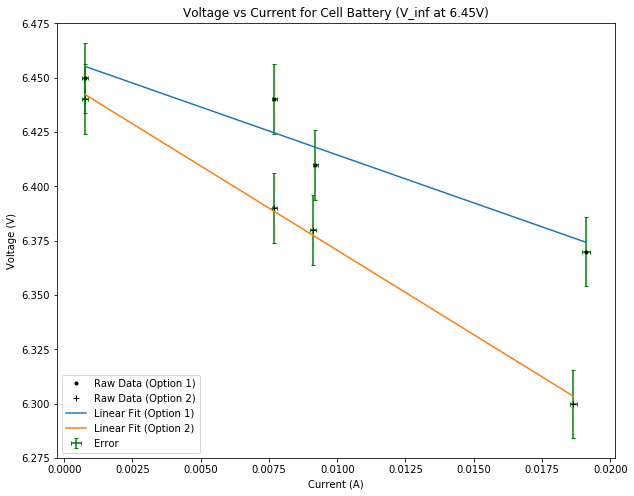

In [21]:
#Calling curve_fit() for these data sets 
p_opt1, p_cov1 = curve_fit(f, cb1_i, cb1_v, (-1, 6.4), cb1_i_error, True)
p_opt2, p_cov2 = curve_fit(f, cb2_i, cb2_v, (-1, 6.4), cb2_i_error, True)
print('Estimated Parameters:')
print(p_opt1)
print(p_opt2)
print()
print('Uncertainty in each Parameter:')
print(p_cov1[0,0]**0.5, p_cov1[1,1]**0.5)
print(p_cov2[0,0]**0.5, p_cov2[1,1]**0.5)
print()

#Outputs based on the model function
output1 = f(cb1_i, p_opt1[0], p_opt1[1])
output2 = f(cb2_i, p_opt2[0], p_opt2[1])

#Calculating chi squared
chi_sq_1 = (1/2)*(np.sum(((cb1_v - output1) / cb1_v_error)**2))
chi_sq_2 = (1/2)*(np.sum(((cb2_v - output2) / cb2_v_error)**2))
print('Chi Squared Values for Both Options:')
print(chi_sq_1, chi_sq_2)

#Plotting Voltage vs Current
plt.figure(figsize=(10,8))
plt.plot(cb1_i, cb1_v, 'k.', label='Raw Data (Option 1)')
plt.plot(cb2_i, cb2_v, 'k+', label='Raw Data (Option 2)')
plt.plot(cb1_i, output1, label='Linear Fit (Option 1)')
plt.plot(cb2_i, output2, label='Linear Fit (Option 2)')
plt.errorbar(cb1_i, cb1_v, xerr=cb1_i_error, yerr=cb1_v_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.errorbar(cb2_i, cb2_v, xerr=cb2_i_error, yerr=cb2_v_error, linestyle='none', ecolor='g', capsize=2)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current for Cell Battery (V_inf at 6.45V)')
plt.legend(loc='lower left')
plt.show()

Estimated Parameters:
[-1.06145284  6.44986233]
[-2.80803095  6.41030013]

Uncertainty in each Parameter:
0.009064227529013447 8.946158595912176e-05
0.00926354253238607 8.960613561823588e-05

Chi Squared Values for Both Options:
0.009155865336702845 0.07567767887775625


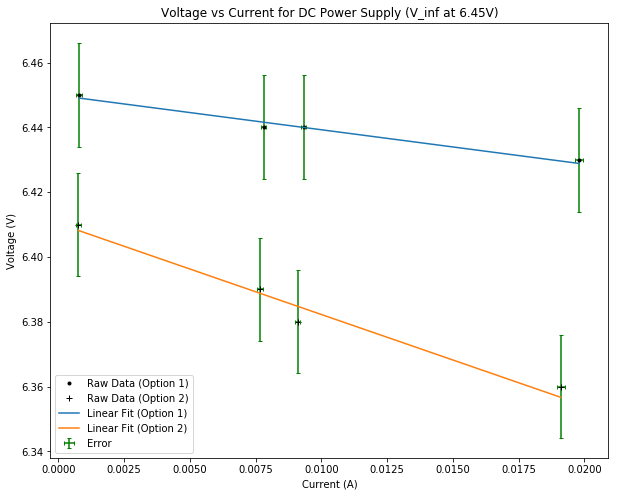

In [22]:
#Calling curve_fit() for these data sets 
p_opt1, p_cov1 = curve_fit(f, ps1_i_6, ps1_v_6, (-1, 6.4), cb1_i_error, True)
p_opt2, p_cov2 = curve_fit(f, ps2_i_6, ps2_v_6, (-1, 6.4), cb2_i_error, True)
print('Estimated Parameters:')
print(p_opt1)
print(p_opt2)
print()
print('Uncertainty in each Parameter:')
print(p_cov1[0,0]**0.5, p_cov1[1,1]**0.5)
print(p_cov2[0,0]**0.5, p_cov2[1,1]**0.5)
print()

#Outputs based on the model function
output1 = f(ps1_i_6, p_opt1[0], p_opt1[1])
output2 = f(ps2_i_6, p_opt2[0], p_opt2[1])

#Calculating chi squared
chi_sq_1 = (1/2)*(np.sum(((ps1_v_6 - output1) / ps1_v_6_error)**2))
chi_sq_2 = (1/2)*(np.sum(((ps2_v_6 - output2) / ps2_v_6_error)**2))
print('Chi Squared Values for Both Options:')
print(chi_sq_1, chi_sq_2)

#Plotting Voltage vs Current
plt.figure(figsize=(10,8))
plt.plot(ps1_i_6, ps1_v_6, 'k.', label='Raw Data (Option 1)')
plt.plot(ps2_i_6, ps2_v_6, 'k+', label='Raw Data (Option 2)')
plt.plot(ps1_i_6, output1, label='Linear Fit (Option 1)')
plt.plot(ps2_i_6, output2, label='Linear Fit (Option 2)')
plt.errorbar(ps1_i_6, ps1_v_6, xerr=ps1_i_6_error, yerr=ps1_v_6_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.errorbar(ps2_i_6, ps2_v_6, xerr=ps2_i_6_error, yerr=ps2_v_6_error, linestyle='none', ecolor='g', capsize=2)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current for DC Power Supply (V_inf at 6.45V)')
plt.legend(loc='lower left')
plt.show()

Estimated Parameters:
[-0.70980472 10.0499564 ]
[-2.38644283 10.10223789]

Uncertainty in each Parameter:
0.006051104139221896 9.00076939342555e-05
0.005833188953116245 8.974016183856043e-05

Chi Squared Values for Both Options:
0.003308157845721892 0.014226372427958565


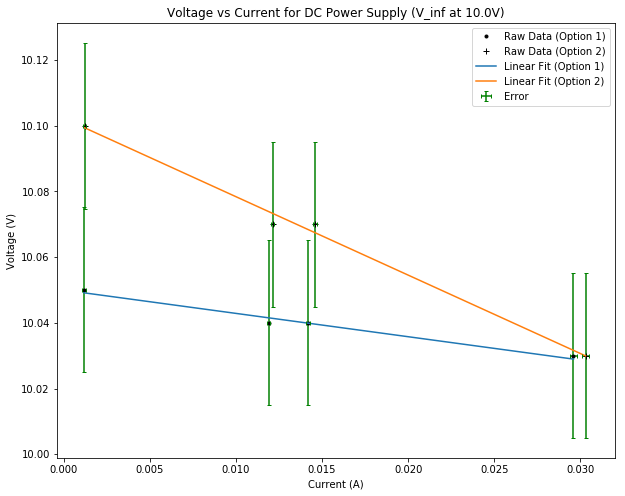

In [23]:
#Calling curve_fit() for these data sets 
p_opt1, p_cov1 = curve_fit(f, ps1_i_10, ps1_v_10, (-1, 10), cb1_i_error, True)
p_opt2, p_cov2 = curve_fit(f, ps2_i_10, ps2_v_10, (-1, 10), cb2_i_error, True)
print('Estimated Parameters:')
print(p_opt1)
print(p_opt2)
print()
print('Uncertainty in each Parameter:')
print(p_cov1[0,0]**0.5, p_cov1[1,1]**0.5)
print(p_cov2[0,0]**0.5, p_cov2[1,1]**0.5)
print()

#Outputs based on the model function
output1 = f(ps1_i_10, p_opt1[0], p_opt1[1])
output2 = f(ps2_i_10, p_opt2[0], p_opt2[1])

#Calculating chi squared
chi_sq_1 = (1/2)*(np.sum(((ps1_v_10 - output1) / ps1_v_10_error)**2))
chi_sq_2 = (1/2)*(np.sum(((ps2_v_10 - output2) / ps2_v_10_error)**2))
print('Chi Squared Values for Both Options:')
print(chi_sq_1, chi_sq_2)

#Plotting Voltage vs Current
plt.figure(figsize=(10,8))
plt.plot(ps1_i_10, ps1_v_10, 'k.', label='Raw Data (Option 1)')
plt.plot(ps2_i_10, ps2_v_10, 'k+', label='Raw Data (Option 2)')
plt.plot(ps1_i_10, output1, label='Linear Fit (Option 1)')
plt.plot(ps2_i_10, output2, label='Linear Fit (Option 2)')
plt.errorbar(ps1_i_10, ps1_v_10, xerr=ps1_i_10_error, yerr=ps1_v_10_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.errorbar(ps2_i_10, ps2_v_10, xerr=ps2_i_10_error, yerr=ps2_v_10_error, linestyle='none', ecolor='g', capsize=2)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current for DC Power Supply (V_inf at 10.0V)')
plt.legend()
plt.show()

Estimated Parameters:
[-1.17659141 15.01039539]
[-2.74378313 14.97746075]

Uncertainty in each Parameter:
0.003919946117958289 9.002164698435334e-05
0.003913477437584163 8.971612155096155e-05

Chi Squared Values for Both Options:
0.013329113163259678 0.0099390265330145


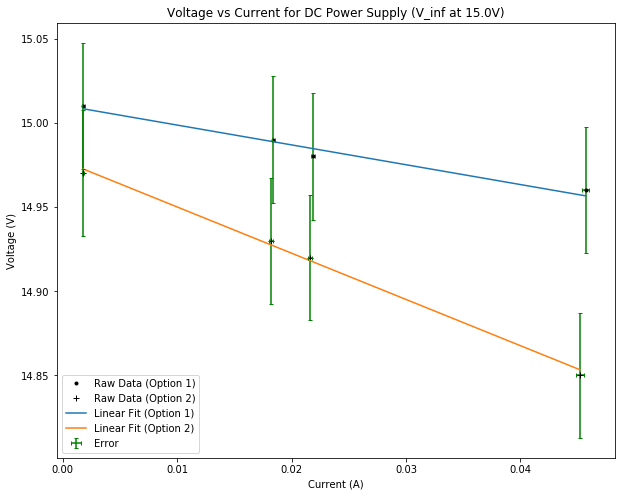

In [24]:
#Calling curve_fit() for these data sets 
p_opt1, p_cov1 = curve_fit(f, ps1_i_15, ps1_v_15, (-1, 15), cb1_i_error, True)
p_opt2, p_cov2 = curve_fit(f, ps2_i_15, ps2_v_15, (-1, 15), cb2_i_error, True)
print('Estimated Parameters:')
print(p_opt1)
print(p_opt2)
print()
print('Uncertainty in each Parameter:')
print(p_cov1[0,0]**0.5, p_cov1[1,1]**0.5)
print(p_cov2[0,0]**0.5, p_cov2[1,1]**0.5)
print()

#Outputs based on the model function
output1 = f(ps1_i_15, p_opt1[0], p_opt1[1])
output2 = f(ps2_i_15, p_opt2[0], p_opt2[1])

#Calculating chi squared
chi_sq_1 = (1/2)*(np.sum(((ps1_v_15 - output1) / ps1_v_15_error)**2))
chi_sq_2 = (1/2)*(np.sum(((ps2_v_15 - output2) / ps2_v_15_error)**2))
print('Chi Squared Values for Both Options:')
print(chi_sq_1, chi_sq_2)

#Plotting Voltage vs Current
plt.figure(figsize=(10,8))
plt.plot(ps1_i_15, ps1_v_15, 'k.', label='Raw Data (Option 1)')
plt.plot(ps2_i_15, ps2_v_15, 'k+', label='Raw Data (Option 2)')
plt.plot(ps1_i_15, output1, label='Linear Fit (Option 1)')
plt.plot(ps2_i_15, output2, label='Linear Fit (Option 2)')
plt.errorbar(ps1_i_15, ps1_v_15, xerr=ps1_i_15_error, yerr=ps1_v_15_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.errorbar(ps2_i_15, ps2_v_15, xerr=ps2_i_15_error, yerr=ps2_v_15_error, linestyle='none', ecolor='g', capsize=2)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current for DC Power Supply (V_inf at 15.0V)')
plt.legend(loc='lower left')
plt.show()

Estimated Parameters:
[-1.18342415 19.86515084]
[-2.59814326 19.80519827]

Uncertainty in each Parameter:
0.0029281192166494374 9.006980969670605e-05
0.002936104201479694 8.993711857969803e-05

Chi Squared Values for Both Options:
0.0059959572699809244 0.001195198291477558


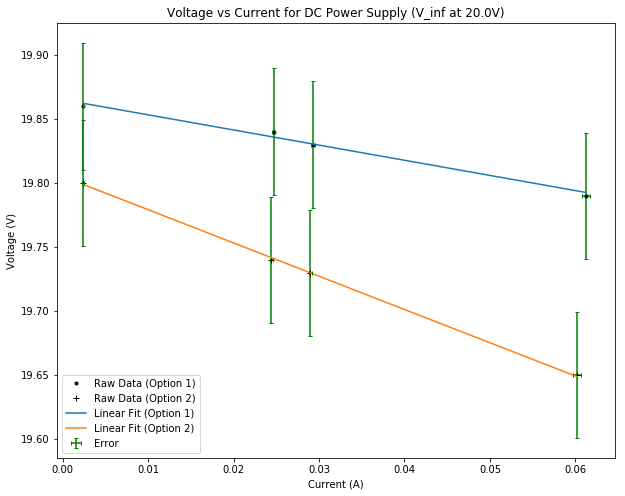

In [25]:
#Calling curve_fit() for these data sets 
p_opt1, p_cov1 = curve_fit(f, ps1_i_20, ps1_v_20, (-1, 20), cb1_i_error, True)
p_opt2, p_cov2 = curve_fit(f, ps2_i_20, ps2_v_20, (-1, 20), cb2_i_error, True)
print('Estimated Parameters:')
print(p_opt1)
print(p_opt2)
print()
print('Uncertainty in each Parameter:')
print(p_cov1[0,0]**0.5, p_cov1[1,1]**0.5)
print(p_cov2[0,0]**0.5, p_cov2[1,1]**0.5)
print()

#Outputs based on the model function
output1 = f(ps1_i_20, p_opt1[0], p_opt1[1])
output2 = f(ps2_i_20, p_opt2[0], p_opt2[1])

#Calculating chi squared
chi_sq_1 = (1/2)*(np.sum(((ps1_v_20 - output1) / ps1_v_20_error)**2))
chi_sq_2 = (1/2)*(np.sum(((ps2_v_20 - output2) / ps2_v_20_error)**2))
print('Chi Squared Values for Both Options:')
print(chi_sq_1, chi_sq_2)

#Plotting Voltage vs Current
plt.figure(figsize=(10,8))
plt.plot(ps1_i_20, ps1_v_20, 'k.', label='Raw Data (Option 1)')
plt.plot(ps2_i_20, ps2_v_20, 'k+', label='Raw Data (Option 2)')
plt.plot(ps1_i_20, output1, label='Linear Fit (Option 1)')
plt.plot(ps2_i_20, output2, label='Linear Fit (Option 2)')
plt.errorbar(ps1_i_20, ps1_v_20, xerr=ps1_i_20_error, yerr=ps1_v_20_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.errorbar(ps2_i_20, ps2_v_20, xerr=ps2_i_20_error, yerr=ps2_v_20_error, linestyle='none', ecolor='g', capsize=2)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current for DC Power Supply (V_inf at 20.0V)')
plt.legend(loc='lower left')
plt.show()